# Отбор признаков для моделий

In [ ]:
#импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn.linear_model import LogisticRegression
from sklearn import metrics #метрики

from sklearn.preprocessing import OneHotEncoder # кодирует категориальные признаки

from sklearn.model_selection import train_test_split #сплитование выборки
import warnings
warnings.simplefilter(action='ignore')

In [ ]:
sfs1 = SFS(knn_reg,
           k_features=1,
           forward=True,
           floating=False,
           verbose=2,
           scoring='neg_mean_squared_error',
           cv=0,
           n_jobs=-1)  # Включаем параллельную обработку


Ссылка на лекцию https://www.youtube.com/watch?v=2yJSSgppLA0&t=1769s

## Методы основанные на корреляции

In [ ]:
import numpy as np
import pandas as pd

# Создание фиктивных данных для примера
np.random.seed(0)
n_samples = 1000
n_features = 5
data = pd.DataFrame(np.random.randn(n_samples, n_features), columns=[f'Feature_{i}' for i in range(n_features)])
target = pd.Series(np.random.randn(n_samples), name='Target')

# Рассчитываем корреляцию между признаками и целевой переменной
correlation = data.corrwith(target)

# Выводим абсолютные значения корреляции, сортируем по убыванию и выводим результат
correlation = correlation.abs().sort_values(ascending=False)
print("Важность признаков на основе корреляции с целевой переменной:")
print(correlation)


Важность признаков на основе корреляции с целевой переменной:
Feature_2    0.034056
Feature_4    0.025753
Feature_1    0.013655
Feature_0    0.012704
Feature_3    0.006924
dtype: float64


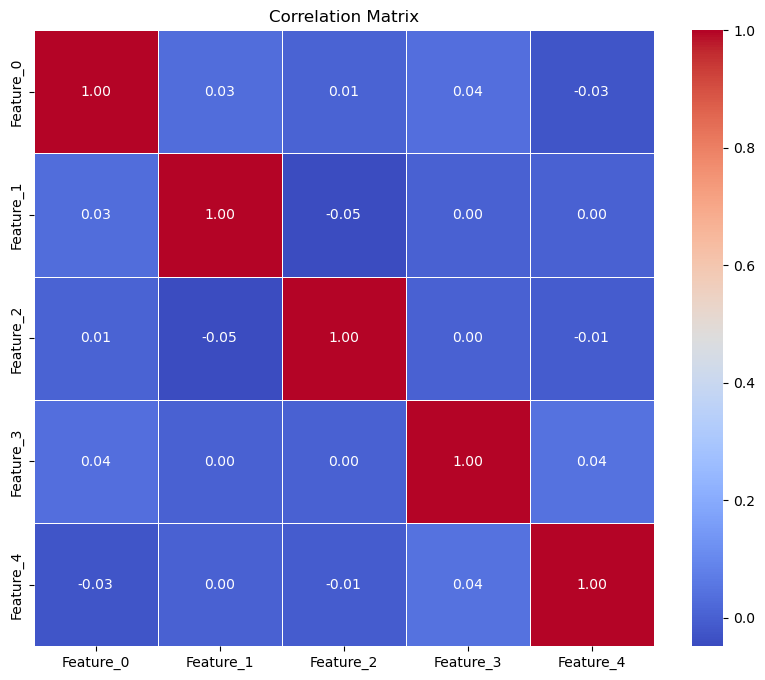

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создание корреляционной матрицы
corr_matrix = data.corr()

# Визуализация корреляционной матрицы с использованием тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## Методы основанные на статистических характеристиках

https://scikit-learn.ru/1-13-feature-selection/?ysclid=lvhy9kgrlk278349951

SelectKBest - выбирает К лучших признаков.    
SelectPercentile - выбирает К процентов лучших признаков    
В качестве функции выбирается:    
Для регрессии: f_regression, mutual_info_regression     
Для классификации: chi2, f_classif, mutual_info_classif

In [ ]:
import numpy as np

# Создание фиктивных данных для примера
np.random.seed(0)
n_samples = 1000
n_features = 5
data = np.random.randn(n_samples, n_features)

# Вычисление коэффициента вариации для каждого признака
coeff_variation = np.std(data, axis=0) / np.mean(data, axis=0)

# Вывод коэффициента вариации для каждого признака
for i, cv in enumerate(coeff_variation):
    print(f"Feature {i}: Coefficient of Variation = {cv}")


Feature 0: Coefficient of Variation = -16.012435344394756
Feature 1: Coefficient of Variation = 28.33578522698025
Feature 2: Coefficient of Variation = -49.094798099852554
Feature 3: Coefficient of Variation = -49.64231257697162
Feature 4: Coefficient of Variation = -235.1265805944971


### SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Загрузка данных California Housing
california_housing = fetch_california_housing()
X, y = california_housing.data, california_housing.target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание объекта SelectKBest с функцией оценки f_regression и выбором 5 лучших признаков
selector = SelectKBest(score_func=f_regression, k=5)

# Применение метода отбора признаков к обучающим данным
X_train_selected = selector.fit_transform(X_train, y_train)

# Получение индексов выбранных признаков
selected_indices = selector.get_support(indices=True)

# Вывод индексов выбранных признаков
print("Selected feature indices:", selected_indices)


Selected feature indices: [0 1 2 3 6]


In [ ]:
# Создание объекта SelectKBest с функцией оценки mutual_info_regression и выбором 5 лучших признаков
selector = SelectKBest(score_func=mutual_info_regression, k=5)

# Применение метода отбора признаков к обучающим данным
X_train_selected = selector.fit_transform(X_train, y_train)

# Получение индексов выбранных признаков
selected_indices = selector.get_support(indices=True)

# Вывод индексов выбранных признаков
print("Selected feature indices:", selected_indices)


Selected feature indices: [0 2 5 6 7]


### SelectPercentile

In [ ]:
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Загрузка данных California Housing
california_housing = fetch_california_housing()
X, y = california_housing.data, california_housing.target

# Масштабирование данных в диапазон от 0 до 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Создание объекта SelectPercentile с функцией оценки f_regression и выбором 50% лучших признаков
selector = SelectPercentile(score_func=f_regression, percentile=50)

# Применение метода отбора признаков к обучающим данным
X_train_selected = selector.fit_transform(X_train, y_train)

# Получение индексов выбранных признаков
selected_indices = selector.get_support(indices=True)

# Вывод индексов выбранных признаков
print("Selected feature indices:", selected_indices)


Selected feature indices: [0 1 2 6]


## Методы обертования

Используются методы машинного обучения для отбора признаков    
Методы обертования используют 'жадные алгоритмы' - прямые, обратные и полного перебора признаков    
Используется библиотека __MLxtend__ https://rasbt.github.io/mlxtend/https://rasbt.github.io/mlxtend/

__Sequential Feature Selector__    
    -Sequential Forward Selection (SFS)    
    -Sequential Backward Selection (SBS)     
    -Sequential Forward Floating Selection (SFFS)    
    -Sequential Backward Floating Selection (SBFS)    

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Создание регрессора KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=4)

# Создание объекта SequentialFeatureSelector
sfs1 = SFS(knn_reg,
           k_features=1,  # Выбираем только один лучший признак
           forward=True,  # Последовательный прямой отбор признаков
           floating=False,  # Не используем "плавающие" признаки
           verbose=2,  # Уровень вывода информации
           scoring='neg_mean_squared_error',  # Метрика оценки качества для регрессии
           cv=0)  # Количество фолдов для кросс-валидации

# Применение SequentialFeatureSelector к данным
sfs1 = sfs1.fit(X, y)

# Вывод результатов отбора признаков
print(sfs1.subsets_)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


{1: {'feature_idx': (0,), 'cv_scores': array([-0.54344949]), 'avg_score': -0.5434494922409826, 'feature_names': ('0',)}}


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2024-05-13 23:40:47] Features: 1/1 -- score: -0.5434494922409826

In [ ]:
X.shape

(20640, 8)

## МЕТОДЫ ВЛОЖЕНИЯ

__Модели для оценки важности признаков:__    
- Линейные модели.
- Метод опорных векторов с l1-регулирезацией.    
- Дерево решений.
- Ассамблевые модели на основе деревьев решений.

1. **Линейные модели:**
   - Линейные модели, такие как линейная регрессия или логистическая регрессия, определяют важность признаков на основе коэффициентов, которые они присваивают каждому признаку. Чем больше абсолютное значение коэффициента, тем важнее признак для модели. Например, в линейной регрессии большие по абсолютной величине коэффициенты указывают на то, что соответствующие признаки имеют больший вклад в прогнозируемый результат.

2. **Метод опорных векторов с l1-регуляризацией:**
   - В методе опорных векторов (SVM) с l1-регуляризацией важность признаков определяется через выбранные опорные вектора, которые представляют границы решения. Признаки, которые имеют ненулевые коэффициенты вектора опорных векторов, считаются важными.

3. **Дерево решений:**
   - В дереве решений важность признаков оценивается на основе того, как часто они используются в узлах дерева для разделения данных. Чем более значимым является разделение признаком, тем выше его важность. Обычно, для дерева решений важность признака определяется на основе уменьшения критерия информативности, такого как Gini impurity или энтропия.

4. **Ассамблевые модели на основе деревьев решений:**
   - Ассамблевые модели, такие как случайный лес или градиентный бустинг, строят множество деревьев решений и комбинируют их прогнозы. Важность признаков в таких моделях обычно оценивается на основе того, как часто признак используется в различных деревьях ансамбля. Обычно это вычисляется как средняя важность признака по всем деревьям ансамбля.



### Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score , classification_report, auc

# Загрузка набора данных Iris
data = load_iris()
X, y = data.data, data.target

# Создание модели логистической регрессии
model = LogisticRegression()

# Обучение модели на данных
model.fit(X, y)

# Получение коэффициентов модели (весов признаков)
coefficients = model.coef_

# Вывод коэффициентов (весов) для каждого признака в данных Iris.
for feature_name, coefficient in zip(data.feature_names, coefficients[0]):
    print(f'Признак "{feature_name}": {coefficient}')


Признак "sepal length (cm)": -0.4184741166958975
Признак "sepal width (cm)": 0.966371608592751
Признак "petal length (cm)": -2.520586806534738
Признак "petal width (cm)": -1.0841625628537739


In [ ]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




1. `LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=1000)`: Создает экземпляр модели логистической регрессии с указанными параметрами:
   - `C=1000`: Это параметр регуляризации. Значение `C` обратно пропорционально силе регуляризации. Большее значение `C` означает меньшую силу регуляризации.
   - `solver='liblinear'`: Это алгоритм оптимизации, используемый для решения задачи оптимизации логистической регрессии. `liblinear` - это алгоритм, подходящий для малых датасетов.
   - `penalty='l1'`: Указывает использование L1-регуляризации, которая добавляет штраф к функции потерь модели, равный абсолютной сумме коэффициентов.
   - `max_iter=1000`: Это максимальное количество итераций, которые алгоритм может выполнить в процессе обучения.



In [ ]:
# Используем L1-регуляризацию
model = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(C=1000, max_iter=1000, penalty='l1', solver='liblinear')

In [ ]:
model.coef_

array([[  0.66584108,   3.69829204,  -3.34251571, -12.97131762],
       [  0.05134869,  -2.90805887,   1.01235554,  -2.36733704],
       [ -2.11727372,  -6.74130056,   8.09215368,  16.02480319]])

In [ ]:
# Предсказание меток классов для обучающего набора данных
y_pred = model.predict(X)

# Вычисление метрик
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1 = f1_score(y, y_pred, average='weighted')

# Для вычисления ROC-AUC необходимо использовать вероятности принадлежности к классам
y_proba = model.predict_proba(X)
roc_auc = roc_auc_score(y, y_proba, multi_class='ovr')  # multiclass='ovr' для многоклассовых данных

# Вывод результатов
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')


Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1-score: 0.98
ROC-AUC: 1.00



SHAP (SHapley Additive exPlanations) - это метод объяснения моделей машинного обучения, который предназначен для интерпретации **прогнозов модели**, объясняя, какие функции модели вносят наибольший вклад в конкретные прогнозы. SHAP значения представляют собой вклад каждого признака в прогноз модели для конкретного примера данных.

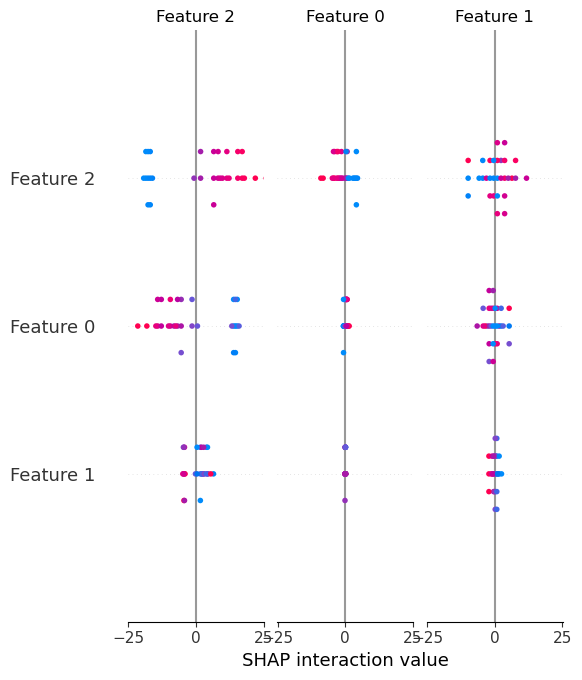

In [ ]:
import shap

# Обучение объекта explainer на том же наборе данных, что и модель
explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")

# Расчет SHAP значений для тестового набора данных
shap_values = explainer.shap_values(X_test)

# Построение графика SHAP значений
shap.summary_plot(shap_values, X_test)


### Линейный классификатор на основе SVM

In [ ]:
from sklearn.svm import LinearSVC

# Создание модели линейного классификатора на основе SVM
model = LinearSVC(C=0.01, penalty='l1', max_iter=2000, dual=False)

# Обучение модели на данных
model.fit(X_train, y_train)


LinearSVC(C=0.01, dual=False, max_iter=2000, penalty='l1')

In [ ]:
# Получение предсказаний на тестовых данных
y_pred = model.predict(X_test)

# Вывод предсказанных меток
print("Предсказанные метки для тестовых данных:")
print(y_pred)


Предсказанные метки для тестовых данных:
[2 0 2 2 2 0 2 2 2 2 2 0 0 0 0 2 2 2 2 2 0 2 0 2 2 2 2 2 0 0]


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Загрузка датасета Iris
iris = load_iris()
X, y = iris.data, iris.target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели линейного классификатора на основе SVM
svm_model = LinearSVC(C=0.01, penalty='l1', max_iter=2000, dual=False)

# Обучение модели
svm_model.fit(X_train, y_train)

# Получение предсказаний на тестовых данных
y_pred = svm_model.predict(X_test)

# Вывод отчета о классификации
print("Отчет о классификации:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Отчет о классификации:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.00      0.00      0.00         9
   virginica       0.55      1.00      0.71        11

    accuracy                           0.70        30
   macro avg       0.52      0.67      0.57        30
weighted avg       0.54      0.70      0.59        30



### Дерево решений

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Загрузка данных California Housing
california_housing = fetch_california_housing()
X, y = california_housing.data, california_housing.target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели дерева решений для регрессии
model = DecisionTreeRegressor()

# Обучение модели на обучающих данных
model.fit(X_train, y_train)

# Предсказание значений для тестовых данных
y_pred = model.predict(X_test)

# Вывод предсказанных значений
print("Предсказанные значения для тестовых данных:")
print(y_pred)


Предсказанные значения для тестовых данных:
[0.414   1.203   5.00001 ... 5.00001 0.66    2.071  ]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE

# Вывод результатов
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00


### Ассамблевые модели на основе деревьев решений

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Загрузка данных
california_housing = fetch_california_housing()
X, y = california_housing.data, california_housing.target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели градиентного бустинга на основе деревьев решений для регрессии
gb_model = GradientBoostingRegressor()

# Обучение модели градиентного бустинга на обучающих данных
gb_model.fit(X_train, y_train)

# Предсказание значений для тестовых данных
y_pred_gb = gb_model.predict(X_test)

# Вычисление среднеквадратичной ошибки для градиентного бустинга
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Среднеквадратичная ошибка для градиентного бустинга:", mse_gb)

# Создание модели случайного леса для регрессии
rf_model = RandomForestRegressor()

# Обучение модели случайного леса на обучающих данных
rf_model.fit(X_train, y_train)

# Предсказание значений для тестовых данных
y_pred_rf = rf_model.predict(X_test)

# Вычисление среднеквадратичной ошибки для случайного леса
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Среднеквадратичная ошибка для случайного леса:", mse_rf)


Среднеквадратичная ошибка для градиентного бустинга: 0.2940787695751335
Среднеквадратичная ошибка для случайного леса: 0.2554894028925712


Эти среднеквадратичные ошибки означают, что среднеквадратичное отклонение (MSE) для градиентного бустинга составляет приблизительно 0.2941, а для случайного леса - приблизительно 0.2555.

## Гибридные методы

### Рекурсивное добавление и удаление признаков

Рекурсивное добавление и удаление признаков (Recursive Feature Addition and Elimination) - это стратегия отбора признаков, которая использует итеративный подход для оценки важности признаков и их последующего добавления или удаления из модели.

1. **Рекурсивное добавление признаков (RFA)**:
   - Начинается с пустого набора признаков.
   - Последовательно добавляются признаки один за другим.
   - Для каждого добавленного признака оценивается его важность для модели.
   - Оценка производительности модели пересчитывается после добавления каждого признака.
   - Признаки сохраняются в порядке их важности.
   - Процесс продолжается до тех пор, пока не будет достигнуто определенное условие остановки, например, заданное количество признаков или достижение определенного уровня производительности модели.

2. **Рекурсивное удаление признаков (RFE)**:
   - Начинается с полного набора признаков.
   - Последовательно удаляются признаки один за другим.
   - Для каждого удаленного признака оценивается его важность для модели.
   - Оценка производительности модели пересчитывается после удаления каждого признака.
   - Признаки сохраняются в порядке их важности.
   - Процесс продолжается до тех пор, пока не будет достигнуто определенное условие остановки.



Recursive Feature Addition.   
Recursive Feature Eliminftion

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression

X = [[1, 9, 9],[1, 9, 9],[1, 9, 9],
     [0, 9, 9],[0, 9, 9],[0, 9, 9]]
y = [1, 1, 1, 0, 0, 0]

clf = LogisticRegression().fit(X, y)
result = permutation_importance(clf, X, y, n_repeats=10, random_state=0)

print(result.importances_mean)  # Средние значения важности признаков
print(result.importances_std)   # Стандартное отклонение важности признаков


[0.46666667 0.         0.        ]
[0.22110832 0.         0.        ]


In [ ]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Создание синтетических данных
X, y = make_classification(n_samples=100, n_features=10, random_state=42)

# Инициализация модели
model = LogisticRegression()

# Инициализация селектора с указанием количества признаков для оставления
rfe = RFE(estimator=model, n_features_to_select=5, step=1)

# Применение RFE к данным
rfe.fit(X, y)

# Вывод ранжирования признаков
print("Feature ranking:", rfe.ranking_)

# Вывод отобранных признаков
print("Selected features:", [i for i, v in enumerate(rfe.support_) if v])


Feature ranking: [1 1 1 1 3 4 1 5 2 6]
Selected features: [0, 1, 2, 3, 6]


### Определения важности признаков на основе перемешевания данных

Permuation feature imporance    
Feature selection by random shuffling

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
X = [[1, 9, 9],[1, 9, 9],[1, 9, 9],
     [0, 9, 9],[0, 9, 9],[0, 9, 9]]
y = [1, 1, 1, 0, 0, 0]
clf = LogisticRegression().fit(X, y)
result = permutation_importance(clf, X, y, n_repeats=10,
                                random_state=0)
print(result.importances_mean)
print(result.importances_std)

[0.46666667 0.         0.        ]
[0.22110832 0.         0.        ]


In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

# Создание синтетических данных
X, y = make_classification(n_samples=100, n_features=10, random_state=42)

# Инициализация модели (в данном случае логистической регрессии)
model = LogisticRegression()

# Обучение модели
model.fit(X, y)

# Оценка важности признаков на основе перемешивания данных
result = permutation_importance(model, X, y, n_repeats=10, random_state=0)

# Вывод средних значений важности признаков
print("Mean importance:", result.importances_mean)

# Вывод стандартного отклонения важности признаков
print("Standard deviation of importance:", result.importances_std)


Mean importance: [0.185 0.04  0.333 0.052 0.004 0.008 0.01  0.    0.009 0.   ]
Standard deviation of importance: [0.03640055 0.01264911 0.04980964 0.01469694 0.00489898 0.006
 0.00894427 0.         0.00538516 0.        ]
